In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [436]:
import io
df= pd.read_csv(io.BytesIO(uploaded["creditcard.csv"]))

**Balancing the data**

In [437]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [438]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [439]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [440]:
x_data= data.drop(columns=["Class", "Time"], axis=0)
label = data["Class"]

# mean=x_data.mean(axis=0)
# std=x_data.std(axis=0)
# x_data = (x_data-mean)/std



**Splitting Training and Test data**

In [441]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [442]:
train_data.shape, test_data.shape

((688, 29), (296, 29))

**Normalizing the data**

In [443]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

# max = train_data.max()
# min = train_data.min()
# train_data = (train_data-min)/(max-min)
# test_data = (test_data - min)/(max-min)


In [444]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

**Building The Network**

In [445]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training The Network**

In [446]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 0.8059 - accuracy: 0.4861 - val_loss: 0.7226 - val_accuracy: 0.5290
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5059 - val_loss: 0.6698 - val_accuracy: 0.6232
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6848 - val_loss: 0.6340 - val_accuracy: 0.7754
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.8718 - val_loss: 0.6074 - val_accuracy: 0.8261
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.9021 - val_loss: 0.5850 - val_accuracy: 0.8841
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.9298 - val_loss: 0.5652 - val_accuracy: 0.8986
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.9561 - val_loss: 0.5464 - val_accuracy: 0.9130
Epoch 8/100


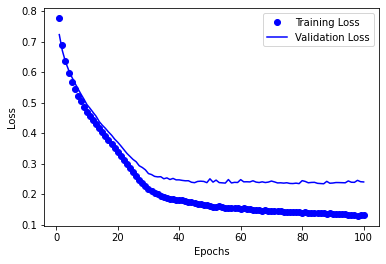

In [447]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

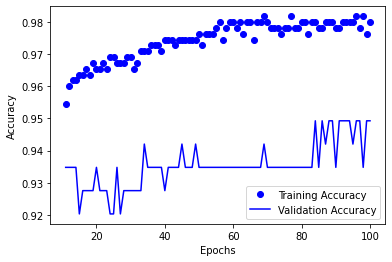

In [448]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[10:], acc[10:], "bo", label="Training Accuracy")
plt.plot(epochs[10:], val_acc[10:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Rebuilding the best fit Model**

In [449]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training the model with all samples**

In [450]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.9302 - accuracy: 0.5011
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8071 - accuracy: 0.5314
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.8413
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.8961
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.9109
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.9288
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.9226
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.9361
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.9323
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.9402
Epoch 11/

**Evaluating the Network**

In [451]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.9223


In [452]:
test_acc_score *100

92.22972989082336

**Predicting the values**

In [453]:
prediction=model.predict(test_data) #astype(dtype="u8")
pred_norm =np.where(prediction>.5, 1, 0)

pred_norm[:10].T

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]])

In [454]:
prediction[:10].T

array([[0.00581419, 0.03836805, 0.99995005, 0.03999978, 1.        ,
        0.02734616, 0.99957526, 0.003894  , 0.01154298, 0.99976945]],
      dtype=float32)

In [455]:
test_labels[:].astype(dtype="int")

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [456]:
pred_check =pred_norm[:].T.astype(dtype="int")

In [457]:
c = pred_check.size
pred_check

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1]]

In [458]:
comapre_pred_test = test_labels == pred_check

In [459]:
a = comapre_pred_test[comapre_pred_test[:]== False].size
a

23

In [460]:
b = comapre_pred_test[comapre_pred_test[:]==True].size
b

273

In [461]:
print("Incorrect Predictions are:", a, "and Correct predictions are :", b, " the percentage is:", round((b/c)*100,2), "%"  )

Incorrect Predictions are: 23 and Correct predictions are : 273  the percentage is: 92.23 %
